### In this notebook we are going to implement the bonus material as part of the lecture on classification.

In [9]:
# Import libraries
import numpy as np 
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# BONUS Material

Import the Titanic dataset and set the feature “survived” as the label. 

In [2]:
data = pd.read_csv('titanic_train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1).dropna().reset_index(drop=True)
print(data.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


In [5]:
data_onehot = pd.get_dummies(data, columns=['Sex',  'Embarked'])
print(data_onehot.head())

X = data_onehot.drop(columns=['Survived'])
y = data_onehot['Survived']

   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0         0       3  22.0      1      0   7.2500           0         1   
1         1       1  38.0      1      0  71.2833           1         0   
2         1       3  26.0      0      0   7.9250           1         0   
3         1       1  35.0      1      0  53.1000           1         0   
4         0       3  35.0      0      0   8.0500           0         1   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1  


Split the data how you believe it should be split. Be prepared to justify.

In [6]:
# Split data into train and test sets with 20% for testing, and 80% for training
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get a small validation set to choose a parameter to maximise performance
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [7]:
# Normalise Age and Fare because they are continous values
X_test['Age'] = X_test['Age'] / X_test['Age'].max()
X_test['Fare'] = X_test['Fare'] / X_test['Fare'].max()

Implement a logistic regression and find the regularisation parameter that maximises performance. 

Find the best regularisation parameter 'C' that will return best performance using GridSearchCV.

In [10]:
# Normalise Age and Fare because they are continous values
X_val['Age'] = X_val['Age'] / X_val['Age'].max()
X_val['Fare'] = X_val['Fare'] / X_val['Fare'].max()

# Try running the logistic regression below (why does the error occur?)
from sklearn.model_selection import GridSearchCV

parameters = {'C':np.arange(0.1, 1)}

svc = LogisticRegression(random_state=0)
grid_search_m = GridSearchCV(svc, parameters)
grid_search_m.fit(X_val, y_val)

# Print best estimator
print(grid_search_m.best_estimator_)

LogisticRegression(C=0.1, random_state=0)


Output the classification threshold and the weights and decide which features are the most important for the prediction problem.

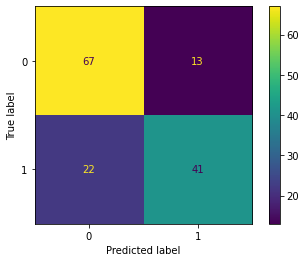

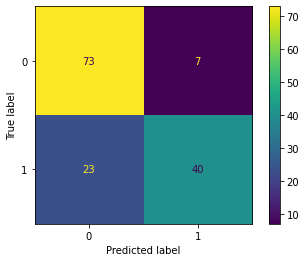

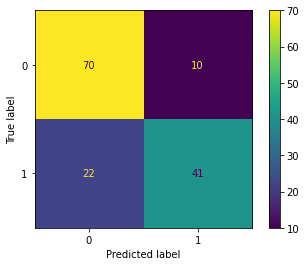

In [11]:
# Use straified K fold because of the imbalanced dataset
kf_stratify = StratifiedKFold(n_splits=3)
kf_stratify.get_n_splits(X_train)

from sklearn.metrics import roc_curve

# Split data into two folds
for train_index, val_index in kf_stratify.split(X_train, y_train):
    X_fold, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Normalise Age and Fare because they are continous values
    X_fold['Age'] = X_fold['Age'] / X_fold['Age'].max()
    X_fold['Fare'] = X_fold['Fare'] / X_fold['Fare'].max()
    
    svc = LogisticRegression(random_state=0, C=0.1)
    svc.fit(X_fold, y_fold)
    
    # Display confusion matrix of LR classifier
    plot_confusion_matrix(svc, X_test, y_test)

Text(0.5, 0, 'Feature Importance')

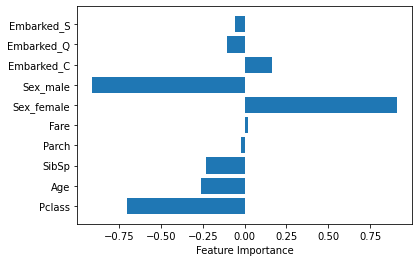

In [12]:
# Plot feature importance

plt.barh(list(X.columns), svc.coef_[0])
plt.xlabel("Feature Importance")